# Big-Mart Sales Prediction 



## Table of Contents 

1] Introduction 

2] Importing Libraries

3] Loading Data Files 

4] Data Visualization

5] Data Preprocessing and Analysis

6] Model Building and Performance analysis

7] Conclusion

##  1. Introduction

### 1.1 Problem Statement


BigMart's data scientists have gathered 2013 sales information for 1559 products from 10 stores located in various cities. Also defined are the characteristics of each product and retailer. 



### 1.2 Target Attribute

The target attribute is Item_Outlet_Sales


### 1.3 Objective

This data science project aims to create a predictive model and determine each product's sales at a certain store.
With the help of this model, BigMart will attempt to comprehend the characteristics of the goods and the shops that are essential to boosting sales.


## 1.4 Attribute Desciption 

Item_Identifier: It represents the unique identifier for each item in the dataset.

Item_Weight: It denotes the weight of the item.

Item_Fat_Content: It indicates the fat content of the item, categorized as "Low Fat" or "Regular".

Item_Visibility: It signifies the percentage of total display area of the item in the store.

Item_Type: It represents the category or type of the item, such as "Dairy", "Soft Drinks", "Meat", etc.

Item_MRP: It denotes the maximum retail price (MRP) of the item.

Outlet_Identifier: It represents the unique identifier for each outlet/store.

Outlet_Establishment_Year: It indicates the year in which the outlet/store was established.

Outlet_Size: It represents the size of the outlet, categorized as "Small", "Medium", or "High".

Outlet_Location_Type: It signifies the location type of the outlet, categorized as "Tier 1", "Tier 2", or "Tier 3".

Outlet_Type: It represents the type of outlet/store, such as "Supermarket Type1", "Supermarket Type2", or "Grocery Store".

Item_Outlet_Sales: It denotes the sales of the item in the respective outlet.

## 2. Importing Libraries 

Firstly we will import the necessary libraries 

1]pandas: Used for data manipulation and analysis, providing data structures and functions for efficiently working with structured data.

2]numpy: Essential library for numerical computing in Python, providing efficient array operations and mathematical functions.

3]seaborn: Data visualization library built on top of matplotlib, used for creating attractive statistical graphics.

4]matplotlib.pyplot: Comprehensive plotting library for creating static, animated, and interactive visualizations in Python.

4]scipy.stats: Module in the SciPy library for statistical functions and distributions, including hypothesis testing, probability distributions, and descriptive statistics.

5]sklearn.preprocessing.LabelEncoder: Used for converting categorical variables into numerical labels for machine learning algorithms.

6]statsmodels.api: Library for statistical modeling and econometrics, providing a wide range of statistical models and tools for data analysis.

7]sklearn.model_selection.train_test_split: Function for splitting datasets into training and testing subsets for model evaluation and validation.

6]sklearn.model_selection.GridSearchCV: Class for performing an exhaustive search over specified hyperparameter values for an estimator, helpful for tuning model performance.

7]sklearn.metrics.mean_squared_error: Metric to evaluate the mean squared error between predicted and true values, commonly used for regression tasks.

8]sklearn.metrics.mean_absolute_error: Metric to evaluate the mean absolute error between predicted and true values, commonly used for regression tasks.

9]sklearn.metrics.r2_score: Metric to evaluate the coefficient of determination (R-squared) between predicted and true values, indicating the goodness of fit of a regression model.

10]sklearn.linear_model.LinearRegression: Linear regression algorithm for modeling the relationship between dependent and independent variables.

11]sklearn.tree.DecisionTreeRegressor: Decision tree-based algorithm for regression tasks, using a tree structure to make predictions.

12]sklearn.ensemble.GradientBoostingRegressor: Ensemble learning method using boosting to combine weak predictive models, often resulting in highly accurate predictions.

13]sklearn.ensemble.RandomForestRegressor: Ensemble learning method using random decision trees to make predictions, typically providing high accuracy and robustness.

14]sklearn.svm.SVR: Support Vector Machine algorithm for regression tasks, aiming to find the best hyperplane that minimizes the error between predicted and true values.







In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import *
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

## 3. Loading the data files

### 3.1 Dataset

In [2]:
train_data=pd.read_excel("F:\\big-mart\Train.xlsx")
test_data=pd.read_excel("F:\\big-mart\Test.xlsx")
train_data.head()
#datafile.head() gives us a first 5 observations from the dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


## 4. Data Visualization

## 4.1 Histogram

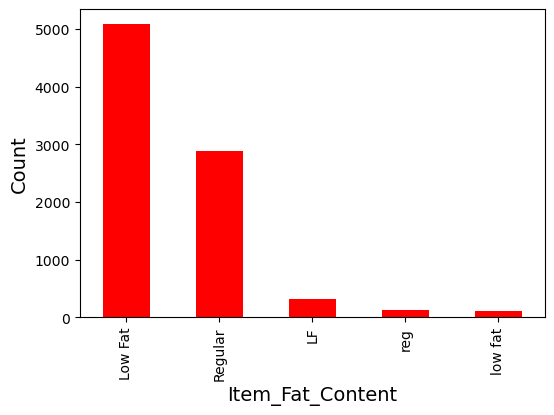

In [4]:
plt.figure(figsize=(6, 4))
train_data['Item_Fat_Content'].value_counts().plot(kind='bar', color='red')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


as we have the values in form of lf , low fat for " Low Fat" and reg for " Regular" we need to convert them into suitable categorical format

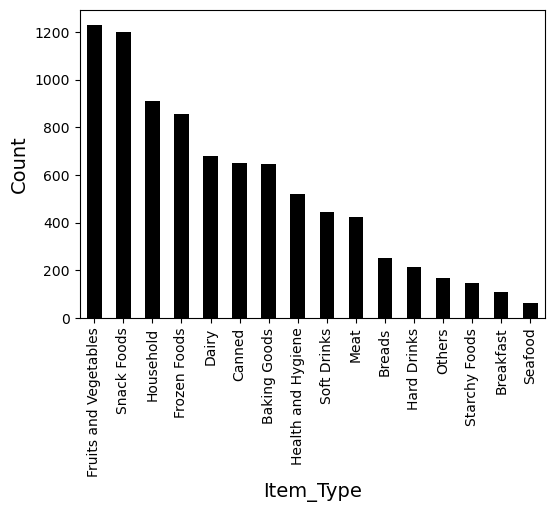

In [5]:
plt.figure(figsize=(6, 4))
train_data['Item_Type'].value_counts().plot(kind='bar', color='black')
plt.xlabel('Item_Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


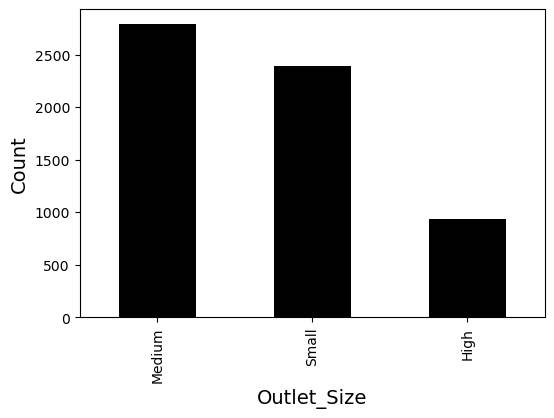

In [6]:
plt.figure(figsize=(6, 4))
train_data['Outlet_Size'].value_counts().plot(kind='bar', color='black')
plt.xlabel('Outlet_Size', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


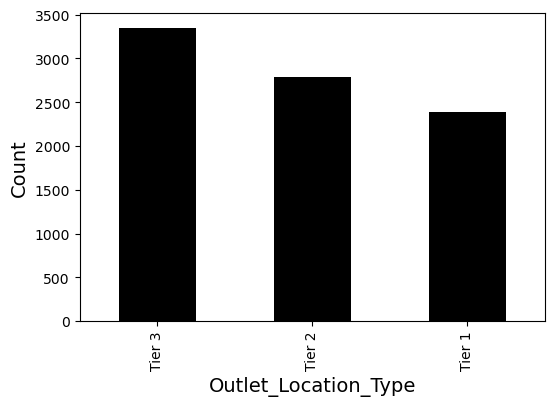

In [7]:
plt.figure(figsize=(6, 4))
train_data['Outlet_Location_Type'].value_counts().plot(kind='bar', color='black')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


Results :
    1)There are many items sold with low fat
    
    2)There are large amount of outltes with medium size
    
    3) All item have near to equal frequency.
    
    4) more outlets of Tier3

### 4.2 HIstogram to see skewness in numeric columns

IndexError: index 4 is out of bounds for axis 0 with size 4

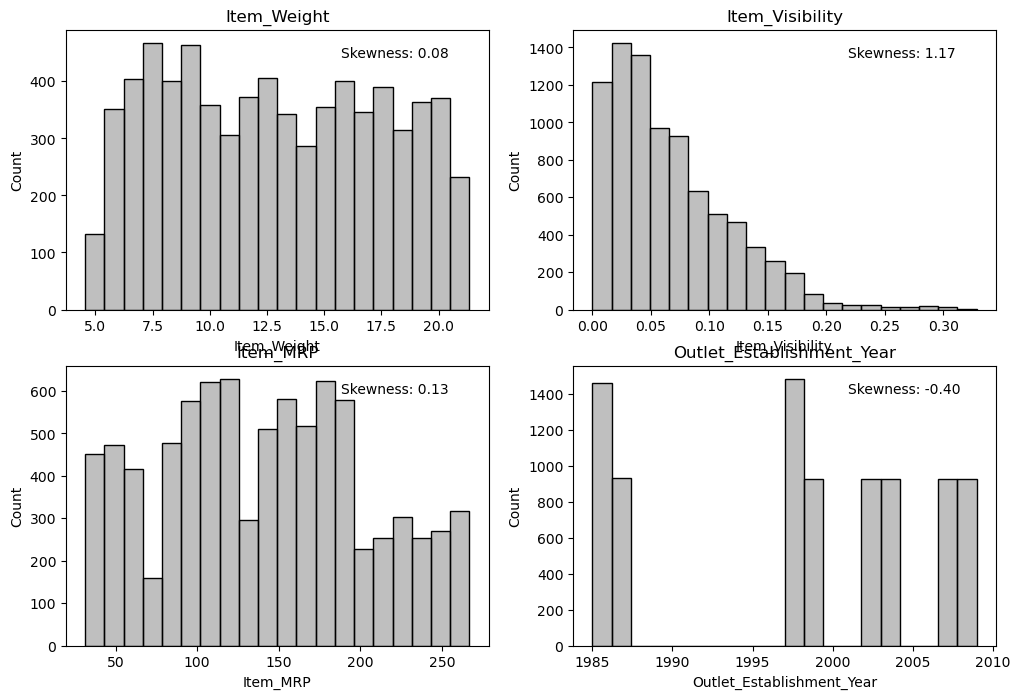

In [8]:
num_f = list(train_data.select_dtypes(include=np.number).columns)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()  # Flatten the axes to access them in a 1D array
for i, field in enumerate(num_f):
    sns.histplot(train_data[field], bins=20, color='gray', edgecolor='k', alpha=0.5, ax=axes[i])
    skewness = train_data[field].skew()
    axes[i].text(0.65, 0.9, f"Skewness: {skewness:.2f}", transform=axes[i].transAxes, fontsize=10)
    axes[i].set_title(field)
    
plt.tight_layout()
plt.show()


1]Item Fat Content: Skewness = 0.62
The skewness value of 0.62 indicates a slightly right-skewed distribution.
This suggests that there might be a higher proportion of items with high fat content in the dataset.

2]Item Visibility: Skewness = 1.17
The skewness value of 1.17 indicates a moderately right-skewed distribution.
This suggests that there might be a longer tail on the right side of the distribution, indicating some items with high visibility values.

3]Item MRP (Maximum Retail Price): Skewness = 0.13
The skewness value of 0.13 indicates a nearly symmetrical distribution.
This suggests that the distribution of item MRP values is fairly balanced without a significant skew.

4]Outlet ID: Skewness = 0.06
The skewness value of 0.06 indicates a nearly symmetrical distribution.
This suggests that the distribution of outlet ID values is fairly balanced without a significant skew.

### 4.3 Boxplot for outlier detection


Boxplot: Boxplot is a graphical representation that provides a visual summary of the distribution of a dataset, highlighting the median, quartiles, and potential outliers. It helps in detecting outliers and understanding the spread and skewness of the data.

IndexError: index 4 is out of bounds for axis 0 with size 4

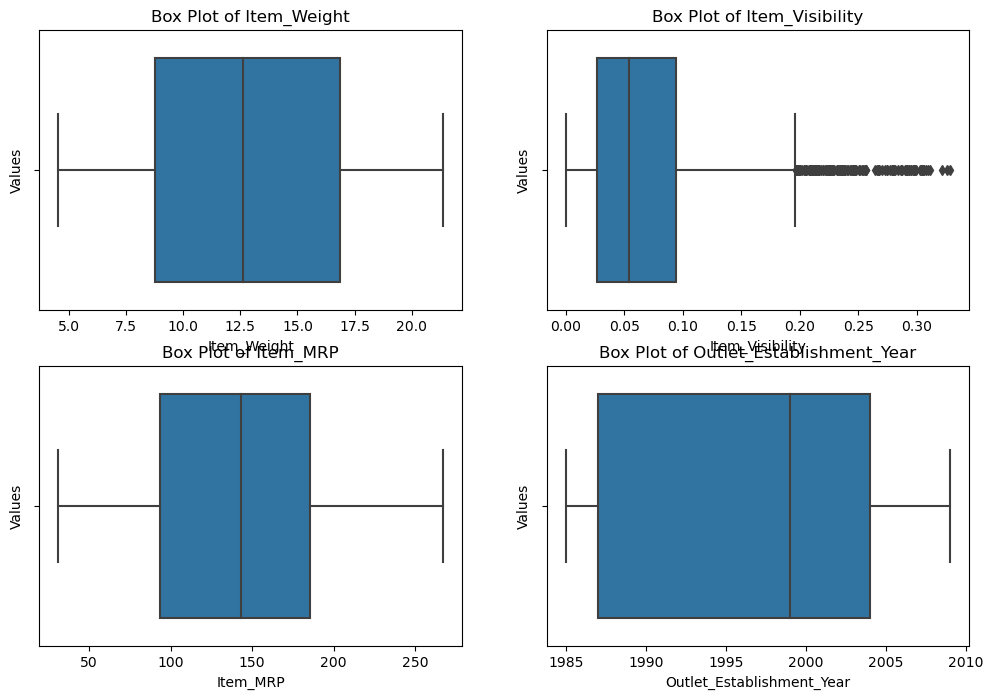

In [9]:
num_cols = train_data.select_dtypes(include=np.number).columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()
for i, column in enumerate(num_cols):
    sns.boxplot(x=train_data[column], ax=axes[i])
    axes[i].set_title('Box Plot of {}'.format(column))
    axes[i].set_ylabel('Values')
plt.tight_layout()
plt.show()


there are so many outliers for our target variable item outlet sales but could not see outliers for other

### 4.4 Scatterplot

Scatterplot is a graph that displays the relationship between two numerical variables, showing how one variable changes with respect to the other. It helps in identifying patterns, trends, and potential correlations between variables in the dataset.

IndexError: index 4 is out of bounds for axis 0 with size 4

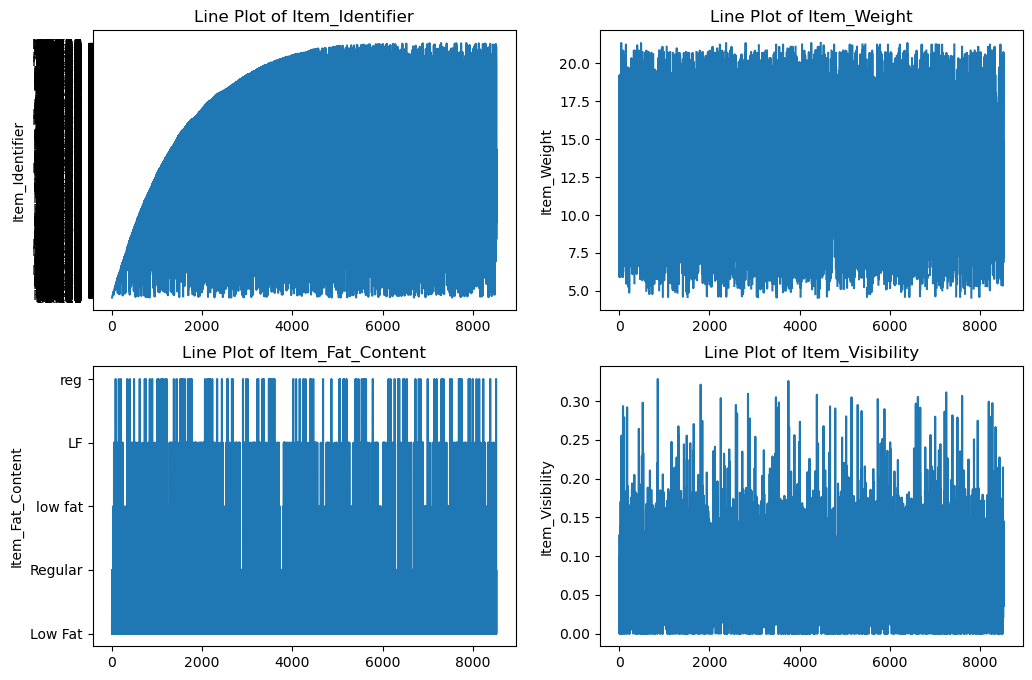

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()
for i, column in enumerate(train_data.columns):
    axes[i].plot(train_data[column])
    axes[i].set_title('Line Plot of {}'.format(column))
    axes[i].set_ylabel(column)
plt.tight_layout()
plt.show()


### 4.5 Pairplot (Bivariate plot)

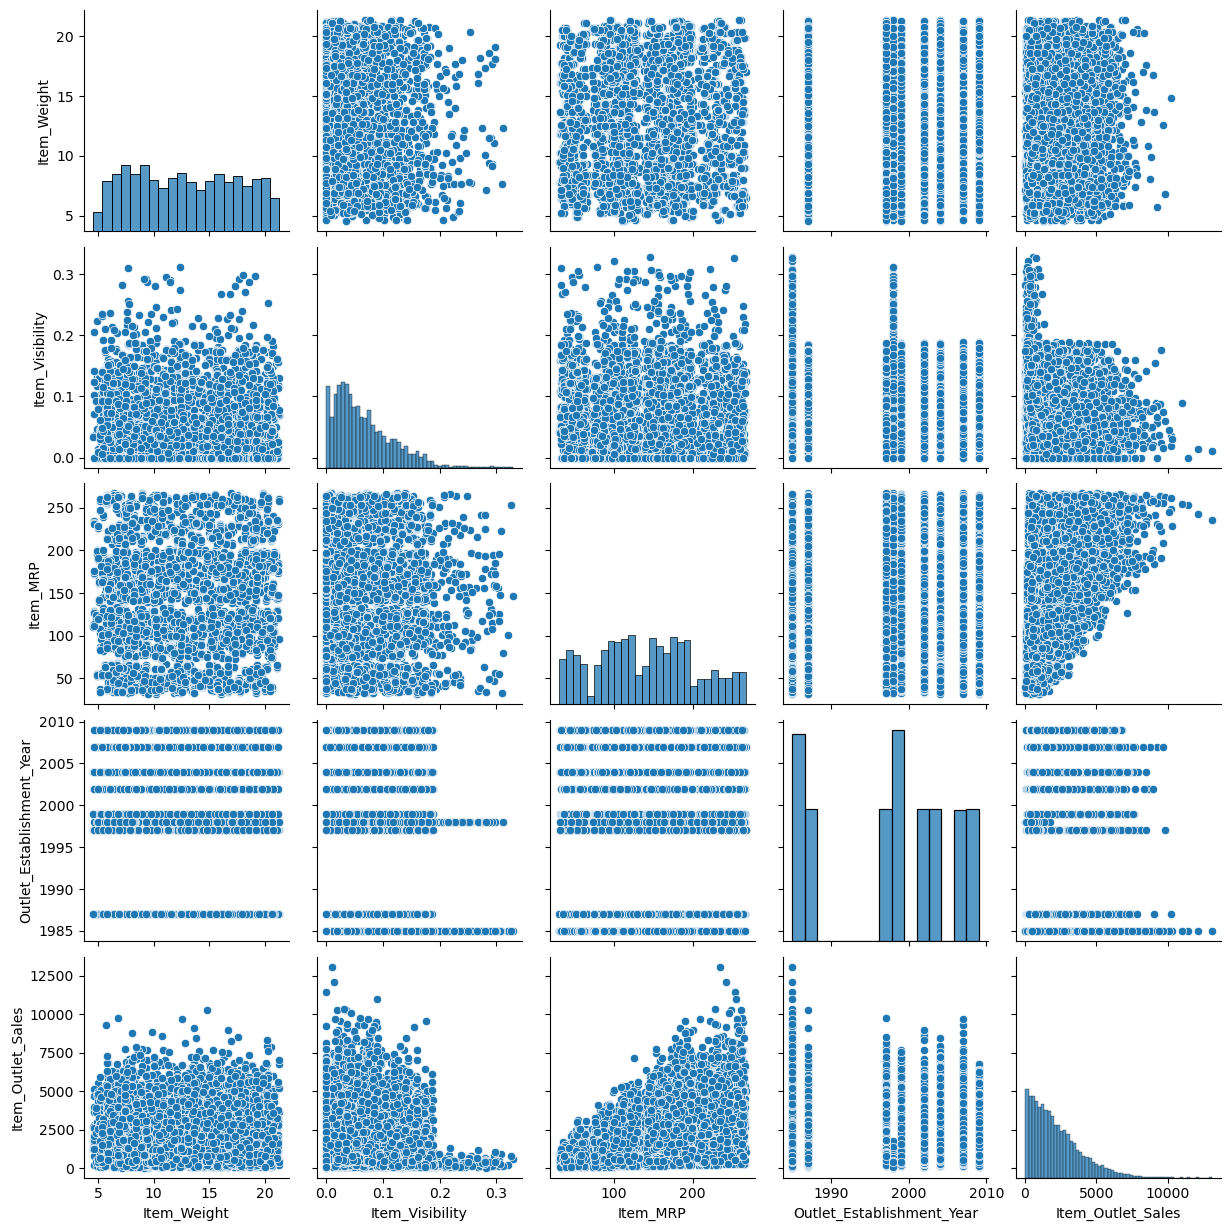

In [11]:
sns.pairplot(train_data)

# 5. Data preprocessing and  analysis

### 5.1 Summary statistics of the data 

In [12]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
test_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


### 5.2 information about number of non empty observations and the data type 

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [15]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [16]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### 5.3 dataset size 

In [17]:
print("shape of train data",train_data.shape)
print("shape of test data",test_data.shape)


shape of train data (8523, 12)
shape of test data (5681, 11)


## Preprocessing train and test data

### 5.4 Imputation and Data Cleaning

In [18]:
train_data['Item_Weight']=train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean)
train_data['Item_Weight']=pd.to_numeric(train_data['Item_Weight'],errors='coerce').fillna(train_data['Item_Weight'].mean)
train_data['Outlet_Size']=train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode)

In [19]:
test_data['Item_Weight']=pd.to_numeric(test_data['Item_Weight'],errors='coerce').fillna(test_data['Item_Weight'].mean)
test_data['Outlet_Size']=test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode)


### 5.5 Encoding

In [20]:
train_data=train_data.replace({'Item_Fat_Content':{'Low Fat':1,'LF':1,'low fat':1,'reg':2,"Regular":2}})
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,1,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,1,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,<bound method Series.mode of 0 Medium\n1...,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,1,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.38,2,0.046982,Baking Goods,108.1570,OUT045,2002,<bound method Series.mode of 0 Medium\n1...,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.6,1,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.21,2,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [21]:
label_encoder = LabelEncoder()
categorical_cols = ['Outlet_Identifier']
for col in categorical_cols:
    train_data[col] = label_encoder.fit_transform(train_data[col])

In [22]:
train_data=pd.get_dummies(train_data,columns=['Item_Type'])
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.3,1,0.016047,249.8092,9,1999,Medium,Tier 1,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.92,2,0.019278,48.2692,3,2009,Medium,Tier 3,Supermarket Type2,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.5,1,0.016760,141.6180,9,1999,Medium,Tier 1,Supermarket Type1,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.2,2,0.000000,182.0950,0,1998,<bound method Series.mode of 0 Medium\n1...,Tier 3,Grocery Store,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,1,0.000000,53.8614,1,1987,High,Tier 3,Supermarket Type1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,1,0.056783,214.5218,1,1987,High,Tier 3,Supermarket Type1,...,0,0,0,0,0,0,0,1,0,0
8519,FDS36,8.38,2,0.046982,108.1570,7,2002,<bound method Series.mode of 0 Medium\n1...,Tier 2,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
8520,NCJ29,10.6,1,0.035186,85.1224,6,2004,Small,Tier 2,Supermarket Type1,...,0,0,1,0,0,0,0,0,0,0
8521,FDN46,7.21,2,0.145221,103.1332,3,2009,Medium,Tier 3,Supermarket Type2,...,0,0,0,0,0,0,0,1,0,0


In [23]:
test_data=test_data.replace({'Item_Fat_Content':{'Low Fat':1,'LF':1,'low fat':1,'reg':2,"Regular":2}})
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,1,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.3,2,0.038428,Dairy,87.3198,OUT017,2007,<bound method Series.mode of 0 Medium\n1...,Tier 2,Supermarket Type1
2,NCN55,14.6,1,0.099575,Others,241.7538,OUT010,1998,<bound method Series.mode of 0 Medium\n1...,Tier 3,Grocery Store
3,FDQ58,7.315,1,0.015388,Snack Foods,155.0340,OUT017,2007,<bound method Series.mode of 0 Medium\n1...,Tier 2,Supermarket Type1
4,FDY38,<bound method NDFrame._add_numeric_operations....,2,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.5,2,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.6,2,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,1,0.073529,Health and Hygiene,118.7440,OUT045,2002,<bound method Series.mode of 0 Medium\n1...,Tier 2,Supermarket Type1
5679,FDJ26,15.3,2,0.000000,Canned,214.6218,OUT017,2007,<bound method Series.mode of 0 Medium\n1...,Tier 2,Supermarket Type1


In [24]:
label_encoder = LabelEncoder()
categorical_cols = ['Item_Fat_Content', 'Outlet_Identifier']
for col in categorical_cols:
    test_data[col] = label_encoder.fit_transform(test_data[col])
test_data=pd.get_dummies(test_data,columns=['Item_Type'])
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  5681 non-null   object 
 1   Item_Weight                      5681 non-null   object 
 2   Item_Fat_Content                 5681 non-null   int64  
 3   Item_Visibility                  5681 non-null   float64
 4   Item_MRP                         5681 non-null   float64
 5   Outlet_Identifier                5681 non-null   int32  
 6   Outlet_Establishment_Year        5681 non-null   int64  
 7   Outlet_Size                      5681 non-null   object 
 8   Outlet_Location_Type             5681 non-null   object 
 9   Outlet_Type                      5681 non-null   object 
 10  Item_Type_Baking Goods           5681 non-null   uint8  
 11  Item_Type_Breads                 5681 non-null   uint8  
 12  Item_Type_Breakfast 

### 5.6 Correlation Analysis

In [25]:
print(train_data.corr())

                                 Item_Fat_Content  Item_Visibility  Item_MRP  \
Item_Fat_Content                         1.000000         0.047314  0.006063   
Item_Visibility                          0.047314         1.000000 -0.001315   
Item_MRP                                 0.006063        -0.001315  1.000000   
Outlet_Identifier                        0.000764        -0.100439  0.003319   
Outlet_Establishment_Year                0.003151        -0.074834  0.005020   
Item_Outlet_Sales                        0.018719        -0.128625  0.567574   
Item_Type_Baking Goods                   0.083804         0.016887 -0.067311   
Item_Type_Breads                         0.032643         0.000416 -0.000112   
Item_Type_Breakfast                      0.065711         0.043418  0.001460   
Item_Type_Canned                         0.073235         0.011114 -0.005666   
Item_Type_Dairy                          0.021236         0.035984  0.035551   
Item_Type_Frozen Foods                  

<AxesSubplot:>

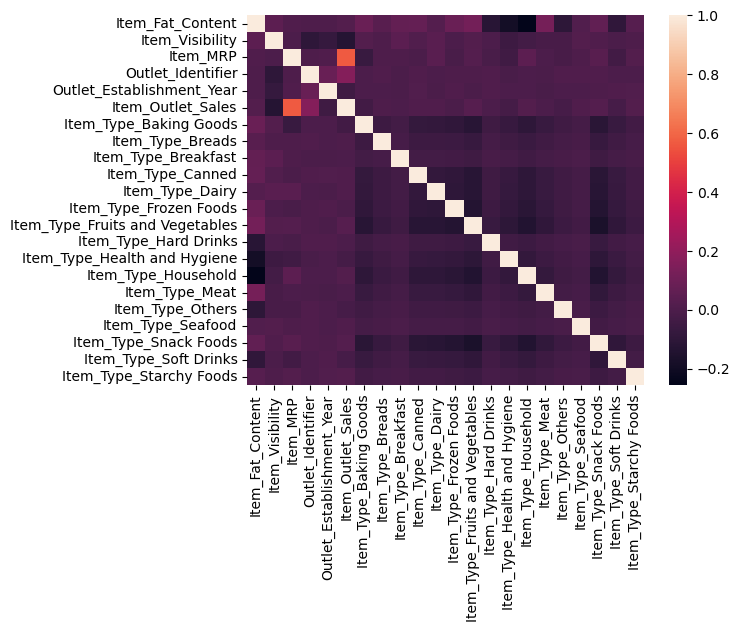

In [26]:
sns.heatmap(train_data.corr())

### 5.7 Removal of unnecessary columns 

In [27]:
train_data=train_data.drop(['Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Identifier'],axis=1)
train_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.3,1,0.016047,249.8092,9,3735.1380,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,2,0.019278,48.2692,3,443.4228,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,17.5,1,0.016760,141.6180,9,2097.2700,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,19.2,2,0.000000,182.0950,0,732.3800,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,1,0.000000,53.8614,1,994.7052,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,214.5218,1,2778.3834,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8519,8.38,2,0.046982,108.1570,7,549.2850,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8520,10.6,1,0.035186,85.1224,6,1193.1136,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8521,7.21,2,0.145221,103.1332,3,1845.5976,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
test_data=test_data.drop(['Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Identifier'],axis=1)
test_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,20.75,0,0.007565,107.8622,9,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,8.3,1,0.038428,87.3198,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,14.6,0,0.099575,241.7538,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,7.315,0,0.015388,155.0340,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,<bound method NDFrame._add_numeric_operations....,1,0.118599,234.2300,5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.5,1,0.013496,141.3154,8,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5677,7.6,1,0.142991,169.1448,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5678,10.0,0,0.073529,118.7440,7,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5679,15.3,1,0.000000,214.6218,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
train_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.3,1,0.016047,249.8092,9,3735.1380,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,2,0.019278,48.2692,3,443.4228,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,17.5,1,0.016760,141.6180,9,2097.2700,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,19.2,2,0.000000,182.0950,0,732.3800,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,1,0.000000,53.8614,1,994.7052,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,214.5218,1,2778.3834,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8519,8.38,2,0.046982,108.1570,7,549.2850,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8520,10.6,1,0.035186,85.1224,6,1193.1136,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8521,7.21,2,0.145221,103.1332,3,1845.5976,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [30]:
test_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,20.75,0,0.007565,107.8622,9,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,8.3,1,0.038428,87.3198,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,14.6,0,0.099575,241.7538,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,7.315,0,0.015388,155.0340,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,<bound method NDFrame._add_numeric_operations....,1,0.118599,234.2300,5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.5,1,0.013496,141.3154,8,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5677,7.6,1,0.142991,169.1448,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5678,10.0,0,0.073529,118.7440,7,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5679,15.3,1,0.000000,214.6218,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      5681 non-null   object 
 1   Item_Fat_Content                 5681 non-null   int64  
 2   Item_Visibility                  5681 non-null   float64
 3   Item_MRP                         5681 non-null   float64
 4   Outlet_Identifier                5681 non-null   int32  
 5   Item_Type_Baking Goods           5681 non-null   uint8  
 6   Item_Type_Breads                 5681 non-null   uint8  
 7   Item_Type_Breakfast              5681 non-null   uint8  
 8   Item_Type_Canned                 5681 non-null   uint8  
 9   Item_Type_Dairy                  5681 non-null   uint8  
 10  Item_Type_Frozen Foods           5681 non-null   uint8  
 11  Item_Type_Fruits and Vegetables  5681 non-null   uint8  
 12  Item_Type_Hard Drink

# 6 Model Building

### 6.1 Separating training and test data

In [32]:
x=train_data.loc[:,(train_data.columns!="Item_Outlet_Sales")]
x = x.apply(pd.to_numeric, errors='coerce')
x = x.replace([np.inf, -np.inf], np.nan)
x = x.fillna(x.mean())
y=train_data[['Item_Outlet_Sales']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
lr=LinearRegression()
tr=DecisionTreeRegressor()
fr=RandomForestRegressor()
gb = GradientBoostingRegressor()

### 6.2 Fitting Different Regression Models

#### 6.2.1 Linear regression 

Linear regression is a statistical technique used to model the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the variables and aims to find the best-fitting line that minimizes the difference between the predicted and actual values. Linear regression is widely used for prediction, inference, and understanding the impact of variables on the outcome.

In [33]:
lr.fit(x_train,y_train)
lr_p=lr.predict(x_test)
lr_mse=mean_squared_error(y_test,lr_p)
print("Mean Squared Error : ",lr_mse)
print("R square :",r2_score(y_test, lr_p))

Mean Squared Error :  1753444.294692053
R square : 0.3567716308656306


We are getting a very high mean squared error value and low r square hence we will conclude that the model is not good fit for the data

#### 6.2.2 Descion Tree Regressor

Decision Tree Regressor is a machine learning algorithm used for regression tasks. It constructs a binary tree where each internal node represents a decision based on a specific feature, and each leaf node represents a predicted output value. It recursively splits the data based on features to minimize the variance of the target variable. Decision Tree Regressor is capable of capturing non-linear relationships and handling both numerical and categorical data. It is interpretable and can handle missing values, but may suffer from overfitting if not properly regularized.

In [34]:
tr.fit(x_train,y_train)
tr_p=tr.predict(x_test)
tr_mse=mean_squared_error(y_test,tr_p)
print("Mean Squared Error : ",tr_mse)
print("R square :",r2_score(y_test, tr_p))

Mean Squared Error :  2200430.4017875474
R square : 0.19280055658451134


Again for descion tree regressor we are getting a very high mean squared error value and low r square hence we will conclude that the model is not good fit for the data

#### 6.2.3 Random Forest Regressor

Random Forest Regressor is an ensemble learning algorithm used for regression tasks. It combines multiple decision trees to make predictions by averaging or taking the majority vote of their individual predictions. Each decision tree is built on a random subset of the features and the data, which helps to reduce overfitting and increase generalization. Random Forest Regressor can handle both numerical and categorical data, provides robustness against outliers and noisy data, and can capture non-linear relationships. It is widely used for predicting continuous target variables and has good performance in various domains

In [35]:
fr.fit(x_train,y_train)
fr_p=fr.predict(x_test)
fr_mse=mean_squared_error(y_test,fr_p)
fr_mse
print(r2_score(y_test, fr_p))

C:\Users\Admin\AppData\Local\Temp\ipykernel_5848\1681992575.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fr.fit(x_train,y_train)


0.5338746965957974


We are getting a low mean squared error value and moderate r square hence we will conclude that the Random forest model is better fit for the data as compared to other 2 models 

#### 6.2.4 Gradient Boost Regressor 

Gradient Boosting Regressor is an ensemble learning algorithm used for regression tasks. It combines multiple weak predictive models, typically decision trees, in a sequential manner. Each subsequent model is trained to correct the errors made by the previous models. The algorithm minimizes a loss function by iteratively fitting new models to the negative gradient of the loss function. Gradient Boosting Regressor is effective in capturing complex relationships and handling both numerical and categorical data. It can handle outliers and missing values, and it provides high predictive accuracy. However, it is computationally expensive and requires careful tuning of hyperparameters to avoid overfitting.

In [36]:
gb.fit(x_train,y_train)
gb_p=gb.predict(x_test)
gb_mse=mean_squared_error(y_test,gb_p)
print("gb-mse",gb_mse)
print("gb-r2",r2_score(y_test,gb_p))


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


gb-mse 1083084.6493630167
gb-r2 0.602684399639513


Now for gradient boost regessor we are getting a adequate results after compairing with all other models hence we will conclude that gradient boost regressor is well suite for our regression problem.

### 6.3 Variance Inflating Factor 

Variance Inflation Factor (VIF) is a measure that assesses the level of multicollinearity in a regression model. It quantifies how much the variance of the estimated regression coefficients is inflated due to the presence of correlated independent variables. A high VIF indicates a strong correlation between predictor variables, which can lead to unstable and unreliable regression coefficients. It is important to address high VIF values by either removing correlated variables or using regularization techniques to mitigate the multicollinearity issue.

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['features']=x.columns
print(vif)

         vif                         features
0   1.014105                      Item_Weight
1   1.216225                 Item_Fat_Content
2   1.019598                  Item_Visibility
3   1.013008                         Item_MRP
4   1.011107                Outlet_Identifier
5   3.264151           Item_Type_Baking Goods
6   1.852006                 Item_Type_Breads
7   1.444964              Item_Type_Breakfast
8   3.324057                 Item_Type_Canned
9   3.506945                  Item_Type_Dairy
10  4.098803           Item_Type_Frozen Foods
11  5.643437  Item_Type_Fruits and Vegetables
12  1.573910            Item_Type_Hard Drinks
13  2.444057     Item_Type_Health and Hygiene
14  3.749310              Item_Type_Household
15  2.629405                   Item_Type_Meat
16  1.500862                 Item_Type_Others
17  1.231079                Item_Type_Seafood
18  5.353421            Item_Type_Snack Foods
19  2.284574            Item_Type_Soft Drinks
20  1.559690          Item_Type_St

as there is no multicollinearity in dependent variables hence we would not be preferring to implement lasso or ridge regression 

### 6.4 Hyper Parameter Tuning 

We are performing Hyperparameter tuning to optimize the performance of a machine learning model by finding the best combination of hyperparameter values. Hyperparameters control the behavior of the model, such as the learning rate, regularization strength, or tree depth. Tuning these hyperparameters helps to improve the model's ability to generalize, prevent overfitting, and achieve better predictive accuracy.

In [38]:
gb.fit(x_train,y_train)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
# Define your GradientBoostingRegressor
regressor = GradientBoostingRegressor()
# Define the hyperparameters and their values to search
param_grid = {
    'n_estimators': [50, 200, 300],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.005],  # Learning rate
    'max_depth': [3, 4, 5],  # Maximum depth of the individual regression estimators
}
# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=4, scoring='neg_mean_squared_error')
grid_search.fit(x, y)  # X is your feature matrix, y is the target variable
# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
# Print the best hyperparameters
print("Best Hyperparameters:", best_params)
# Train the model with the best hyperparameters
best_model.fit(x, y)
gb_p=best_model.predict(x_test)
gb_mse=mean_squared_error(y_test,gb_p)
print("gb-mse",gb_mse)
print("gb-r2",r2_score(y_test,gb_p))


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


gb-mse 995489.2698126292
gb-r2 0.6348176321023083


by hypertuning we have improved our model and now it is 64% accurate which is pretty good 

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
#fr.fit(x_train,y_train)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
# Create a Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=8, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
# Train the Random Forest Regressor with the best hyperparameters
best_rf = RandomForestRegressor(**best_params)
best_rf.fit(x_train, y_train)
# Make predictions on the test set
y_pred = best_rf.predict(x_test)
fr_p=best_rf.predict(x_test)
fr_mse=mean_squared_error(y_test,fr_p)
fr_mse
print(r2_score(y_test, fr_p))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}


C:\Users\Admin\AppData\Local\Temp\ipykernel_5848\1573996412.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rf.fit(x_train, y_train)


0.586371184443498


## 6.5 Fitting the model 

In [40]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1705 entries, 1281 to 4765
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item_Outlet_Sales  1705 non-null   float64
dtypes: float64(1)
memory usage: 26.6 KB


### 6.5.1 Plot of Actual Values vs Predicted Values 

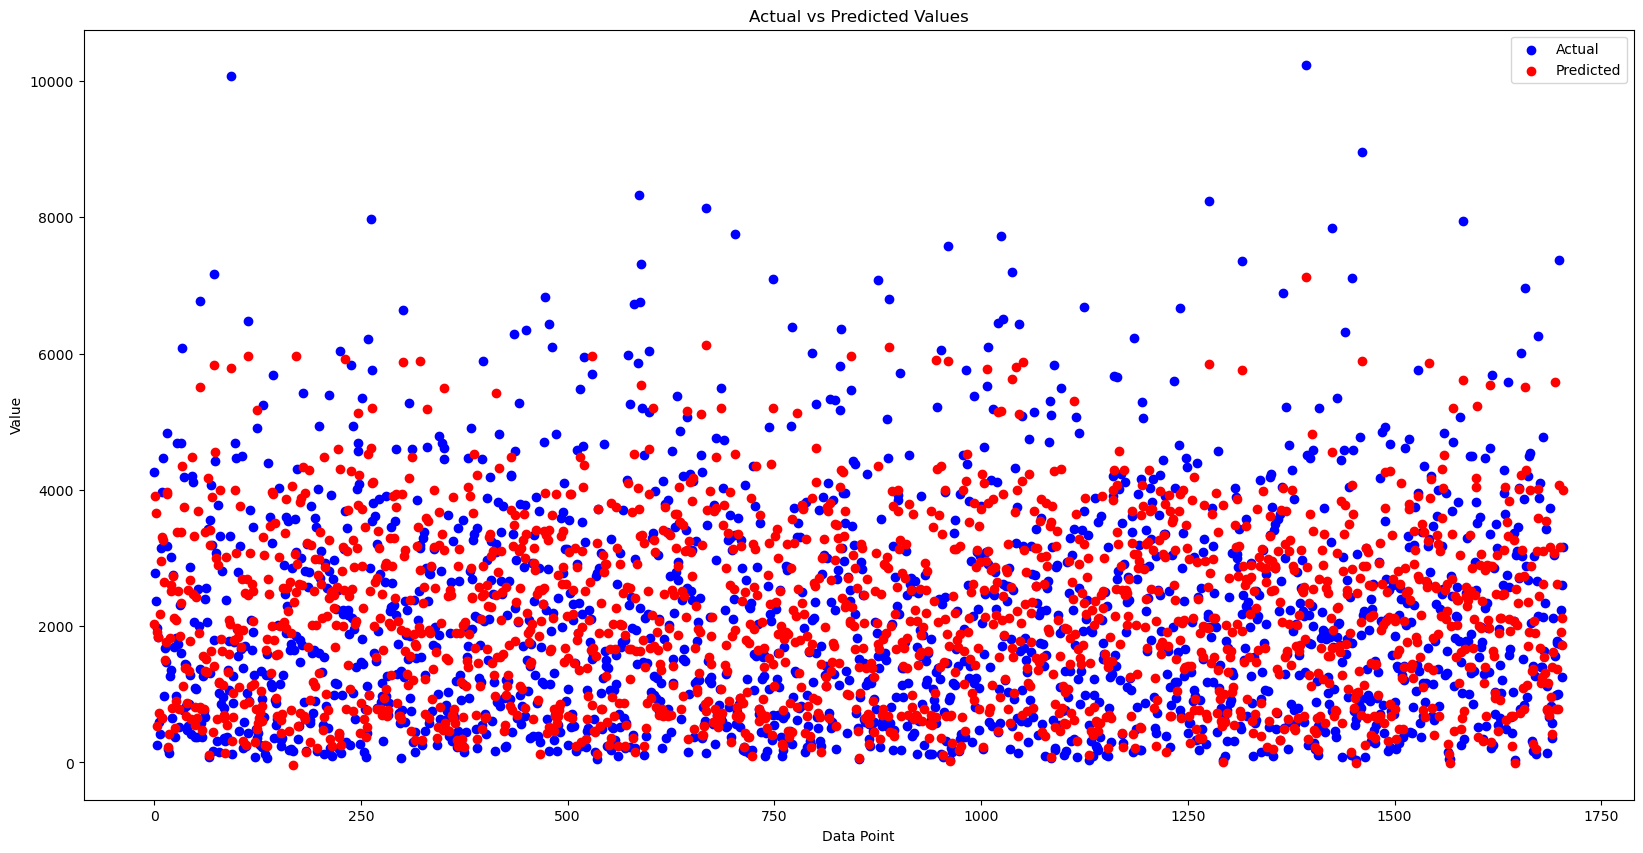

In [41]:
plt.figure(figsize=(20, 10))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
# Plotting the predicted values (gb_p)
plt.scatter(range(len(gb_p)), gb_p, color='red', label='Predicted')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

# 6.5.2 Using Trained model for test data

In [42]:
print(test_data.dtypes)

Item_Weight                         object
Item_Fat_Content                     int64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Identifier                    int32
Item_Type_Baking Goods               uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_Others                     uint8
Item_Type_Seafood                    uint8
Item_Type_Snack Foods                uint8
Item_Type_Soft Drinks                uint8
Item_Type_Starchy Foods              uint8
dtype: object


In [43]:
test_data['Item_Weight']=pd.to_numeric(test_data['Item_Weight'],errors='coerce').fillna(test_data['Item_Weight'].mean)

In [44]:
test_data['Item_Weight'] = pd.to_numeric(test_data['Item_Weight'], errors='coerce')
test_data['Item_Weight'] = test_data['Item_Weight'].astype(float)
x=test_data
x = x.apply(pd.to_numeric, errors='coerce')
x = x.replace([np.inf, -np.inf], np.nan)
x = x.fillna(x.mean())


As our best model is Gradient Boost Regressor Model with Hyper tuned Parameters hence We would predict the target variable in test data by this.

In [45]:
gb_p = best_model.predict(x)
# Create a new column 'Item_Outlet_Sales' in 'test_data' DataFrame
x['Item_Outlet_Sales'] = gb_p

# Print the updated 'test_data' DataFram
print(x)

      Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  \
0       20.750000                 0         0.007565  107.8622   
1        8.300000                 1         0.038428   87.3198   
2       14.600000                 0         0.099575  241.7538   
3        7.315000                 0         0.015388  155.0340   
4       12.695633                 1         0.118599  234.2300   
...           ...               ...              ...       ...   
5676    10.500000                 1         0.013496  141.3154   
5677     7.600000                 1         0.142991  169.1448   
5678    10.000000                 0         0.073529  118.7440   
5679    15.300000                 1         0.000000  214.6218   
5680     9.500000                 1         0.104720   79.7960   

      Outlet_Identifier  Item_Type_Baking Goods  Item_Type_Breads  \
0                     9                       0                 0   
1                     2                       0                 0   


In [46]:
x.to_excel('updated_data.xlsx', index=False)


In [47]:
data=pd.read_excel('updated_data.xlsx')
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Item_Outlet_Sales
0,20.750000,0,0.007565,107.8622,9,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1600.390026
1,8.300000,1,0.038428,87.3198,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1339.785155
2,14.600000,0,0.099575,241.7538,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,603.275707
3,7.315000,0,0.015388,155.0340,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2419.888081
4,12.695633,1,0.118599,234.2300,5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5762.564222


here we can see that the new dataset is created which include the column Item_outlet_Sales where the values are predicted using our best fit model 

# 7. Cocnlusion

1] The linear regression model and random forest model were not good fit for the given model and gave us the bad estimated values 

2] Gradient boost regressor model was pretty good and more accurate thatn the oher 2 models hence we have finalised it as our best model. 

3] Hypertuning has improved the model accuracy by 3% which is not up to mark but still it is the better version as compared to all models.

4] As we didn't find any multicollinearity as such hence we have not used lasso or ridge regression. 